In [80]:
import numpy

natm = 16
nroots = 5
log_file = open("../data/scan.log", "r")

zeta    = []
rhf_ene = []
cis_ene = []

istep = 1

for l in log_file.readlines():
    dir_name = f"scan-{istep}"
    zeta.append(float(l.split()[1]))
    
    with open("./" + dir_name + "/out.log", "r") as f:
        lines = f.readlines()
        rhf_ene.append(float(lines[0].split()[2]))
        
        es = [float(l.split()[2]) for l in lines[2:]]
        cis_ene.append(es)

    istep += 1

cis_ene = numpy.asarray(cis_ene).reshape(-1, nroots)

In [81]:
import matplotlib as mpl
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

params = {
        "font.size":       20,
        "axes.titlesize":  16,
        "axes.labelsize":  24,
        "axes.grid":       True,
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "figure.subplot.wspace":0.0,
        "figure.subplot.hspace":0.0,
        "axes.spines.right":True,
        "axes.spines.top":True,
        "xtick.direction":'in',
        "ytick.direction":'in'
}

mpl.rcParams.update(params)

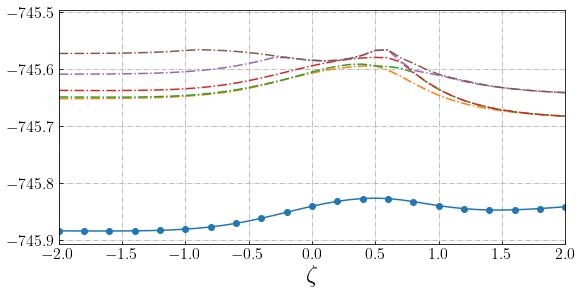

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)

ax.plot(zeta, rhf_ene, "o-", markevery=2, label="RHF")
ax.plot(zeta, rhf_ene+cis_ene[:, 0], "-.")
ax.plot(zeta, rhf_ene+cis_ene[:, 1], "-.")
ax.plot(zeta, rhf_ene+cis_ene[:, 2], "-.")
ax.plot(zeta, rhf_ene+cis_ene[:, 3], "-.")
ax.plot(zeta, rhf_ene+cis_ene[:, 4], "-.")
ax.grid(True, linestyle='-.')
ax.set_ylim(-745.906, -745.496)
ax.set_xlim(-2.0, 2.0)
ax.set_xlabel(r"$\zeta$")
ax.set_ylabel(r"Energy (a.u.)")

ax.grid(True, linestyle='-.')
fig.tight_layout(pad=0.2)

0.23213418